In [18]:
import cv2
from PIL import Image
import numpy as np
import imutils
from matplotlib import pyplot as plt

In [2]:
#pip install imutils

In [19]:
im= cv2.imread(r"1.jpg",cv2.IMREAD_GRAYSCALE)

In [20]:
cv2.imshow('Black white image',im)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [8]:
def remove_back(img):
    img_thres = img
    img_thres[ img < 180] = 0
    return img_thres
img = remove_back(im)

In [9]:
#grayImage = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
(thresh, blackAndWhiteImage) = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)

In [10]:
cv2.imshow('Black white image', blackAndWhiteImage)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [11]:
#filtering
kernel = np.ones((12,12),np.float32)/25
dst = cv2.filter2D(blackAndWhiteImage,-1,kernel)
cv2.imshow('Black white image', dst)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [12]:
retval, thresh = cv2.threshold(dst, 127, 255, 0)
img_contours, _ = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
cv2.drawContours(dst, img_contours, -1, (0, 255, 0))
cv2.imshow('Image Contours', dst)
cv2.waitKey(0)

-1

In [13]:
#gray = cv2.cvtColor(dst, cv2.COLOR_BGR2GRAY)
#gray = cv2.GaussianBlur(gray, (5, 5), 0)
thresh = cv2.threshold(dst, 45, 255, cv2.THRESH_BINARY)[1]
thresh = cv2.erode(thresh, None, iterations=2)
thresh = cv2.dilate(thresh, None, iterations=2)
# find contours in thresholded image, then grab the largest
# one
cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)
c = max(cnts, key=cv2.contourArea)

In [14]:
# determine the most extreme points along the contour
extLeft = tuple(c[c[:, :, 0].argmin()][0])
extRight = tuple(c[c[:, :, 0].argmax()][0])
extTop = tuple(c[c[:, :, 1].argmin()][0])
extBot = tuple(c[c[:, :, 1].argmax()][0])

In [15]:
# draw the outline of the object, then draw each of the
# extreme points, where the left-most is red, right-most
# is green, top-most is blue, and bottom-most is teal
cv2.drawContours(dst, [c], -1, (0, 255, 255), 2)
cv2.circle(dst, extLeft, 8, (0, 0, 255), -1)
cv2.circle(dst, extRight, 8, (0, 255, 0), -1)
cv2.circle(dst, extTop, 8, (255, 0, 0), -1)
cv2.circle(dst, extBot, 8, (255, 255, 0), -1)
# show the output image
cv2.imshow("Image", dst)
cv2.waitKey(0)

-1

In [16]:
img2= cv2.imread(r"C:\Users\diyas\Documents\Mini Project\PV_images_failures\2019_January_16\Images\Panels_left\DJI_0647.png")
cv2.drawContours(img2, [c], -1, (0, 0, 0), 1)
cv2.circle(img2, extLeft, 1, (0, 0, 0), -1)
cv2.circle(img2, extRight, 1, (0, 0, 0), -1)
cv2.circle(img2, extTop, 1, (0, 0, 0), -1)
cv2.circle(img2, extBot, 1, (0, 0, 0), -1)
# show the output image
cv2.imshow('image', img2)
cv2.waitKey(0)

error: OpenCV(4.2.0) C:\projects\opencv-python\opencv\modules\highgui\src\window.cpp:376: error: (-215:Assertion failed) size.width>0 && size.height>0 in function 'cv::imshow'


In [17]:
cv2.imwrite(r"C:\Users\diyas\Downloads\1.jpg",img2)
crop_img1= img2[extTop[1]:extBot[1],extLeft[0]:extRight[0]]
cv2.imshow("cropped", crop_img1)
cv2.waitKey(0)
cv2.imwrite(r"C:\Users\diyas\Downloads\1.jpg",crop_img1)

error: OpenCV(4.2.0) C:\projects\opencv-python\opencv\modules\imgcodecs\src\loadsave.cpp:715: error: (-215:Assertion failed) !_img.empty() in function 'cv::imwrite'


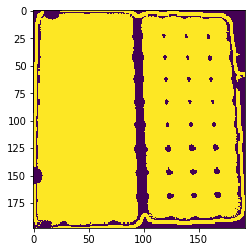

In [25]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

img = cv2.imread(r"1.jpg")
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_OTSU)
#cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU
plt.imshow(thresh)

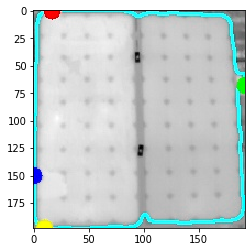

In [26]:
plt.imshow(img)

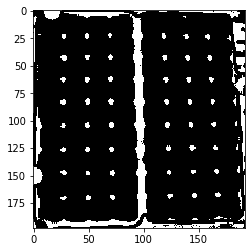

In [27]:
def plotImg(img):
    if len(img.shape) == 2:
        plt.imshow(img, cmap='gray')
        plt.show()
    else:
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        plt.show()




img = cv2.imread(r'1.jpg')

gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
binary_img = cv2.adaptiveThreshold(gray_img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                   cv2.THRESH_BINARY_INV, 51, 15)
plotImg(binary_img)

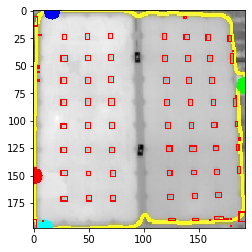

In [28]:
_, _, boxes, _ = cv2.connectedComponentsWithStats(binary_img)
# first box is the background
boxes = boxes[1:]
filtered_boxes = []
for x,y,w,h,pixels in boxes:
    if pixels < 10000 and h < 10 and w < 10 :
        filtered_boxes.append((x,y,w,h))
        #print(x,y,w,h)

for x,y,w,h in filtered_boxes:
    cv2.rectangle(img, (x,y), (x+w,y+h), (0,0,255),1)

plotImg(img)